In [ ]:
from langgraph.graph import StateGraph ,START,END
from typing import  TypedDict


In [33]:
#define a TypedDict for the state
class BMIstate(TypedDict):
    height: float
    weight: float
    bmi: float
    

In [34]:
def calculate_bmi(state: BMIstate) -> BMIstate:
    """Calculate BMI from height and weight."""
    height_m = state['height'] / 100  # Convert cm to m
    state['bmi'] = state['weight'] / (height_m ** 2)
    state['bmi'] = round(state['bmi'], 2)  # Round to 2 decimal places
    return state

In [39]:
def obeasity(state:BMIstate)-> BMIstate:
    """Determine if the person is obese based on BMI."""
    if state['bmi']>30:
        state['obeasity'] = True
        print("---------You are obese------")
    else:
        state['obeasity'] = False
        print("----You are not obese-----")



In [45]:
#define the state graph
graph = StateGraph(BMIstate)

#add node to the graph
graph.add_node('calculate_bmi',calculate_bmi)
graph.add_node('state', obeasity)

#ADD edge to the graph
graph.add_edge(START,'calculate_bmi')
graph.add_edge('calculate_bmi', 'state')
graph.add_edge('state', END)

#compile the graph
workflow =graph.compile()

In [48]:
# execute the workflow
workflow.invoke({'weight': 70, 'height': 170, 'bmi':0 })  # Example input
# Note: The input keys should match the TypedDict keys defined in BMIstate.

----You are not obese-----


{'height': 170, 'weight': 70, 'bmi': 24.22}

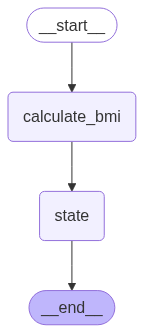

In [42]:
graph.compile()
# this represents the compiled workflow that can be executed with the invoke method.
# The invoke method takes a dictionary that matches the TypedDict keys defined in BMIstate.